In [ ]:
import numpy as np
import cv2
import pandas as pd
from scipy import ndimage as nd
 
from matplotlib import pyplot as plt
import os
from skimage.io import imread, imshow
import glob
from skimage.filters import threshold_otsu

In [ ]:
cd /content/drive/MyDrive/DATA/Hand

/content/drive/MyDrive/DATA/Hand


In [ ]:
def otsu_threshold (img):
  # return the number of threshold
  # np.where to binarize the image given the threshold.
  thresh = threshold_otsu(img)
  # make all pixels > threshold black
  binarized = 1.0 * (img < thresh)

  return binarized.astype(int)

In [ ]:
source_paths = "S1Hand/"
label_path = "S1OtsuLabelHand/"

sources = []
label = []

for file in os.listdir(source_paths):
    if file.endswith("tif"):
      sources.append(file)

       
for file in os.listdir(label_path):
    if file.endswith("tif"):
      label.append(file)


## Sanity Check
sources = sorted(sources)
label = sorted(label)
print(len(sources))
print(len(label))

577
577


In [ ]:
####################################################################
## STEP 1:   READ TRAINING IMAGES AND EXTRACT FEATURES  - Sentinel 1
################################################################
image_dataset_s1 = pd.DataFrame()  #Dataframe to capture image features

img_path = "S1Hand/" ## CHANGE ME!!!
for image in os.listdir(img_path):
  df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
  img = imread(img_path+image)

  vv = imread(img_path + image)[0:1,:,:].reshape((128,128)) 
  vh = imread(img_path + image)[1:2:,:,:].reshape((128,128))
 
  vh_new = vh[np.logical_not(np.isnan(vh))]
  binaryimage = otsu_threshold(vh_new)          
  vh_values = binaryimage.reshape(-1)
  df['Predicted'] = vh_values  

  ######################################                    
  #Update dataframe for images to include details for each image in the loop
  image_dataset_s1 = image_dataset_s1.append(df)

In [ ]:
###########################################################
# STEP 2: READ LABELED IMAGES (MASKS) AND CREATE ANOTHER DATAFRAME
    # WITH LABEL VALUES AND LABEL FILE NAMES
##########################################################
mask_dataset = pd.DataFrame()  #Create dataframe to capture mask info.

mask_path = "S1OtsuLabelHand/" ### CHANGE ME!!!
for mask in label:   #os.listdir(mask_path):
    df2 = pd.DataFrame()  #Temporary dataframe to capture info for each mask in the loop
    input_mask = imread(mask_path + mask)
    label = input_mask
    #Add pixel values to the data frame
    label_values = label.reshape(-1)
    df2['Label_Value'] = label_values
    df2['Mask_Name'] = mask
    mask_dataset = mask_dataset.append(df2)  #Update mask dataframe with all the info from each mask

In [ ]:
 #Concatenate both image and mask datasets
dataset = pd.concat([image_dataset_s1, mask_dataset], axis=1)   

# Drop NA
dataset.dropna(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [ ]:
y_true = dataset.Label_Value.values
y_pred = dataset.Predicted.values

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true, y_pred, normalize=True)
print(acc)

0.8616092625773694


In [ ]:
from sklearn.metrics import f1_score
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')

print("F1 macro", f1_macro)
print("F1 micro", f1_micro)

F1 macro 0.8603484307948339
F1 micro 0.8616092625773694


In [ ]:
from sklearn.metrics import jaccard_score
iou = jaccard_score(y_true, y_pred)
print(iou)

0.7347242724562052


In [ ]:
from sklearn.metrics import recall_score
recal1 = recall_score(y_true, y_pred, average='macro')
recal2 = recall_score(y_true, y_pred, average='micro')
print(recal1, recal2)

0.8590694044957421 0.8616092625773694


In [ ]:
from sklearn.metrics import precision_score
pre1 = precision_score(y_true, y_pred, average='macro')
pre2 = precision_score(y_true, y_pred, average='micro')
print(pre1, pre2)

0.866012541401326 0.8616092625773694


##Classification Maps

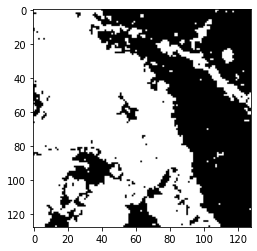

In [ ]:
## Classification Map
source_paths = "S1Hand/"
imagetobeviz = sources[1]

# img = imread(img_path+image)

vv = imread(source_paths + imagetobeviz)[0:1,:,:].reshape((128,128)) 
vh = imread(source_paths + imagetobeviz)[1:2:,:,:].reshape((128,128))
 
# vh_new = vh[np.logical_not(np.isnan(vh))]
binaryimage_vh = otsu_threshold(vh)     

plt.imshow(binaryimage_vh, cmap='binary')

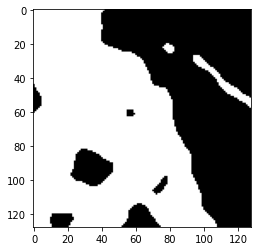

In [ ]:
# Print the corresponding ground truth 
label_path = "S1OtsuLabelHand/"

labeltobeviz = label[1]

mask = imread(label_path + labeltobeviz)

plt.imshow(mask, cmap='binary')